# Ford-Fulkerson-Algorithmus

In [ ]:
import networkx as nx
import random
import matplotlib.pyplot as plt

from collections import deque

Generate graph with 25 directed edges between 18 nodes.

In [ ]:
graph = nx.DiGraph()
graph.add_edge(1, 2, capacity=16)
graph.add_edge(1, 3, capacity=13)
graph.add_edge(2, 3, capacity=10)
graph.add_edge(2, 4, capacity=12)
graph.add_edge(3, 5, capacity=14)
graph.add_edge(4, 6, capacity=10)
graph.add_edge(5, 6, capacity=4)
graph.add_edge(5, 8, capacity=18)
graph.add_edge(6, 7, capacity=20)
graph.add_edge(6, 8, capacity=9)
graph.add_edge(7, 9, capacity=12)
graph.add_edge(7, 10, capacity=20)
graph.add_edge(8, 9, capacity=8)
graph.add_edge(8, 11, capacity=7)
graph.add_edge(9, 12, capacity=10)
graph.add_edge(9, 13, capacity=16)
graph.add_edge(10, 14, capacity=14)
graph.add_edge(11, 15, capacity=14)
graph.add_edge(12, 16, capacity=10)
graph.add_edge(13, 16, capacity=18)
graph.add_edge(14, 17, capacity=9)
graph.add_edge(15, 18, capacity=12)
graph.add_edge(16, 17, capacity=8)
graph.add_edge(16, 18, capacity=12)
graph.add_edge(17, 18, capacity=16)

source = 1
sink = 18

First draw the graph we created

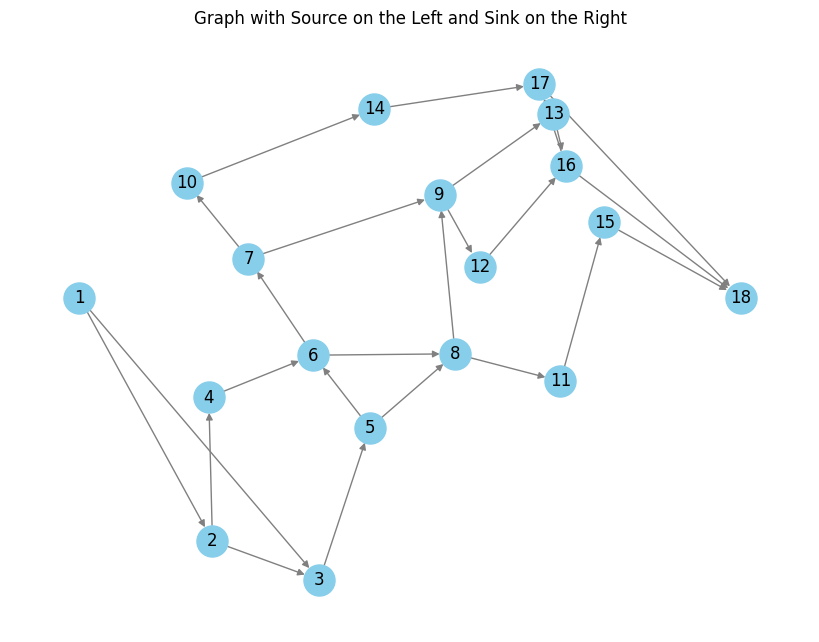

In [ ]:
def custom_layout(graph, source, sink):
    pos = nx.spring_layout(graph, seed=42)
    pos[source] = (-1, 0)  # Place source on the left
    pos[sink] = (1, 0)     # Place sink on the right
    return pos

plt.figure(figsize=(8, 6))
pos = custom_layout(graph, source, sink)
nx.draw(graph, pos, with_labels=True, node_color='skyblue', node_size=500, edge_color='gray')
plt.title("Graph with Source on the Left and Sink on the Right")
plt.show()

In [ ]:
def bfs_path(flow_network, source, sink, parent):
    visited = {node: False for node in flow_network}
    queue = deque([source])
    visited[source] = True

    while queue:
        u = queue.popleft()
        for v in flow_network[u]:
            if not visited[v] and flow_network[u][v]['capacity'] > 0:
                queue.append(v)
                visited[v] = True
                parent[v] = u
                if v == sink:
                    return True
    return False

def ford_fulkerson(graph, source, sink):
    flow_network = graph.copy()
    max_flow = 0
    parent = {}

    while bfs_path(flow_network, source, sink, parent):
        path_flow = float('Inf')
        s = sink

        while s != source:
            path_flow = min(path_flow, flow_network[parent[s]][s]['capacity'])
            s = parent[s]

        v = sink
        while v != source:
            u = parent[v]
            flow_network[u][v]['capacity'] -= path_flow
            if (v, u) not in flow_network.edges():
                flow_network.add_edge(v, u, capacity=0)
            flow_network[v][u]['capacity'] += path_flow
            v = parent[v]

        max_flow += path_flow

    return max_flow

In [ ]:
max_flow = ford_fulkerson(graph, source, sink)
print("Maximum flow:", max_flow)

Maximum flow: 24


Calculate the clustering coefficient for each node, and the average clustering coefficient for the entire graph


# Clustering coefficients

In [ ]:
import networkx as nx
import random
import matplotlib.pyplot as plt

In [ ]:
n = 22
p = 0.3
graph = nx.erdos_renyi_graph(n, p)

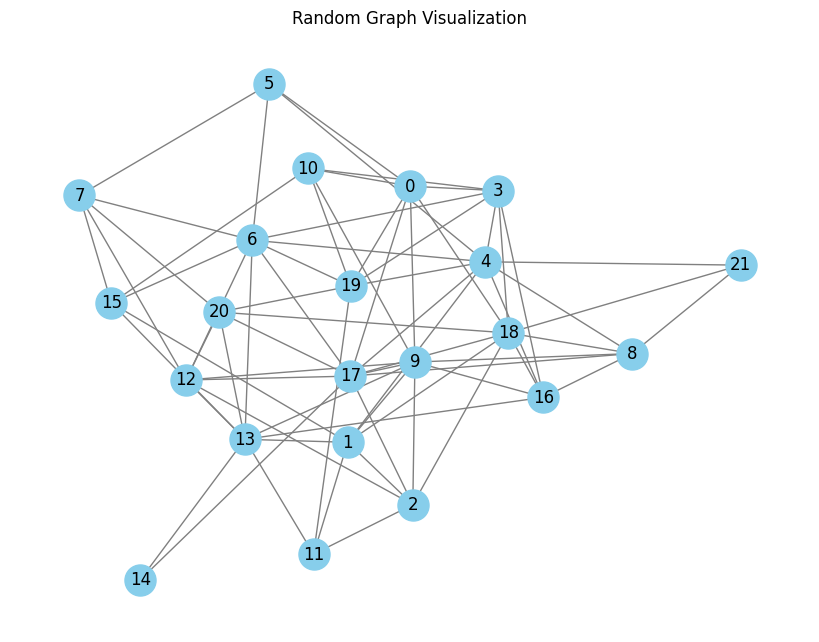

In [ ]:
plt.figure(figsize=(8, 6))
nx.draw(graph, with_labels=True, node_color='skyblue', node_size=500, edge_color='gray')
plt.title("Random Graph Visualization")
plt.show()

In [ ]:
clustering_coefficients = nx.clustering(graph)

average_clustering = nx.average_clustering(graph)

Output the results

In [ ]:
print("Clustering coefficients for each node:", clustering_coefficients)

print("Average clustering coefficient:", average_clustering)

Clustering coefficients for each node: {0: 0.3333333333333333, 1: 0.2857142857142857, 2: 0.4666666666666667, 3: 0.42857142857142855, 4: 0.25, 5: 0.3333333333333333, 6: 0.3055555555555556, 7: 0.4, 8: 0.5333333333333333, 9: 0.3055555555555556, 10: 0.4, 11: 0.3333333333333333, 12: 0.47619047619047616, 13: 0.2222222222222222, 14: 0, 15: 0.3, 16: 0.4, 17: 0.28888888888888886, 18: 0.25, 19: 0.2857142857142857, 20: 0.26666666666666666, 21: 0.6666666666666666}
Average clustering coefficient: 0.3423520923520924


# Scale-free networks

In [ ]:
!pip install powerlaw

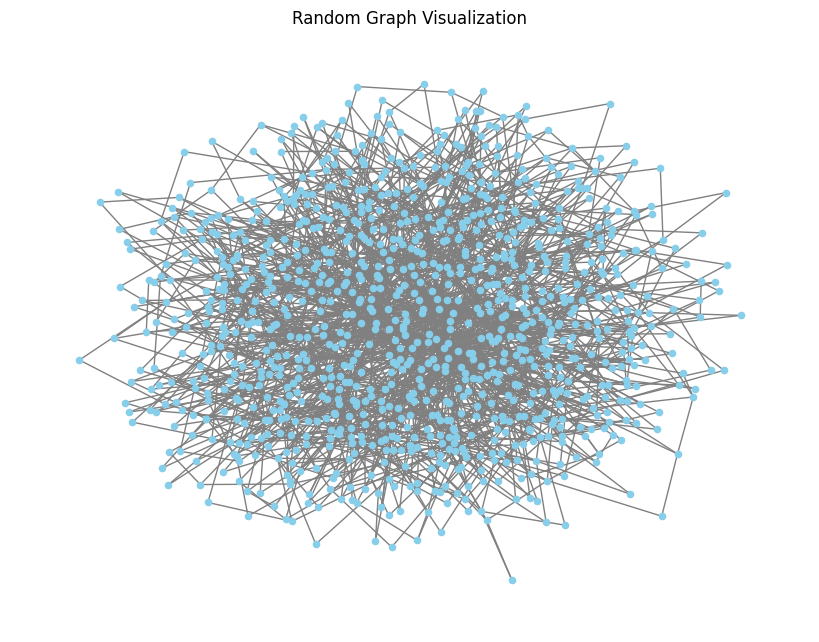

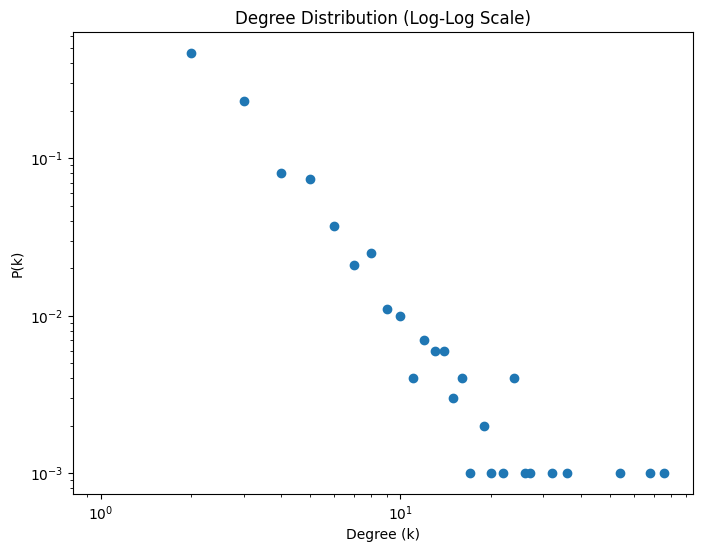

Calculating best minimal value for power law fit
Estimated gamma: 3.2050676178204287
Log-likelihood ratio: 18.67314245129281, p-value: 0.011528609588914442
The network is not scale-free.


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import powerlaw

# Create a network (replace with your own network)
G = nx.barabasi_albert_graph(1000, 2)
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=False, node_color='skyblue', node_size=20, edge_color='gray')
plt.title("Random Graph Visualization")
plt.show()  # Example scale-free network

# Step 1: Compute degrees
degrees = [G.degree(n) for n in G.nodes()]

# Step 2: Plot degree distribution (log-log scale)
degree_count = np.bincount(degrees)
k = np.arange(len(degree_count))
P_k = degree_count / sum(degree_count)  # Normalize to get probabilities

plt.figure(figsize=(8, 6))
plt.loglog(k[k > 0], P_k[k > 0], marker="o", linestyle="None")  # Ignore zero degrees
plt.xlabel("Degree (k)")
plt.ylabel("P(k)")
plt.title("Degree Distribution (Log-Log Scale)")
plt.show()

# Step 3: Fit a power-law model
results = powerlaw.Fit(degrees)
print(f"Estimated gamma: {results.power_law.alpha}")

# Step 4: Compare power-law fit with exponential distribution
R, p = results.distribution_compare('power_law', 'exponential')
print(f"Log-likelihood ratio: {R}, p-value: {p}")

if p > 0.05:
    print("The network's degree distribution is consistent with a power-law (scale-free).")
else:
    print("The network is not scale-free.")
